## Graduate Rotational Internship Program (GRIP)
## Data science & Business Analytics
## Name: Mohamed Ahmed Abd El-Rahman Awad Allah Sayed Al-Ahl
## Task: Exploratory Data Analysis
## link to dataset used: [https://bit.ly/3i4rbWl](https://bit.ly/3i4rbWl)

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
sample = pd.read_csv("SampleSuperstore.csv")
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# figuring num of row and columns in the data set
sample.shape

(9994, 13)

In [4]:
# checking data types:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# Quick view to the statistics
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#Checking Number of Missing Values
sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# Chaecking the dupilication in data
sample.duplicated().sum()

17

In [8]:
# Dropping the Duplicated Values
sample.drop_duplicates(inplace=True)

In [9]:
# Chaecking the dupilication in data again to make sure that already dropped
sample.duplicated().sum()

0

### Let's explore and see what is the max and min ship mode

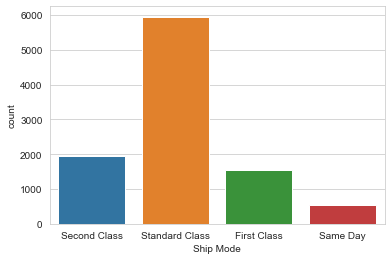

In [10]:
sns.set_style("whitegrid")
sns.countplot(x=sample['Ship Mode']);

### From the above graph, we can say that maximum Ship Mode is of "Standard Class" and minimum is of "Same Day"

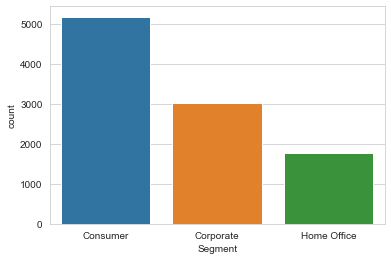

In [11]:
# Finding the max and min segment
sns.set_style("whitegrid")
sns.countplot(x=sample['Segment']);

### We find that the max segment is of the "Consumer" and minimum is of "Home Office".

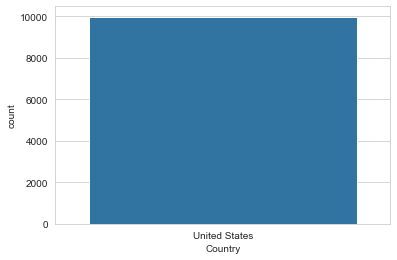

In [12]:
sns.set_style("whitegrid")
sns.countplot(x=sample['Country']);

### This shows the data contains the information only about "United States".

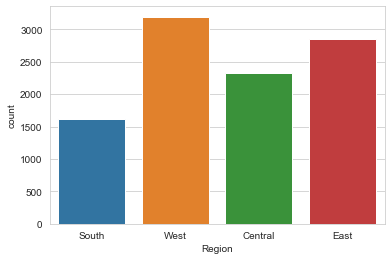

In [13]:
sns.set_style("whitegrid")
sns.countplot(x=sample['Region']);

### This shows the most of the entries are form the "West" Region of United States

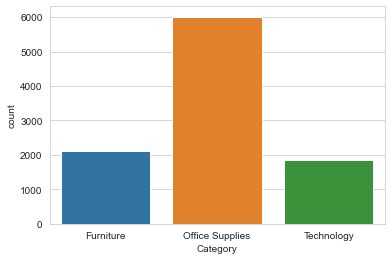

In [14]:
sns.set_style("whitegrid")
sns.countplot(x=sample['Category']);

### Most of the categories of data in the dataset are from "Office Supplies".

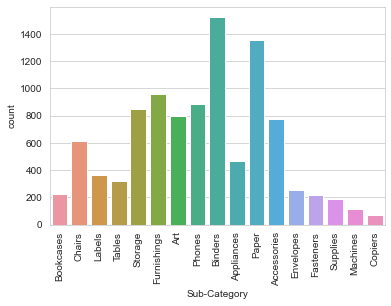

In [15]:
sns.set_style("whitegrid")
sns.countplot(x=sample['Sub-Category'])
plt.xticks(rotation=90);

### Maximum people are "Builders". Then comes "Paper" and the least number of people are "Copiers".

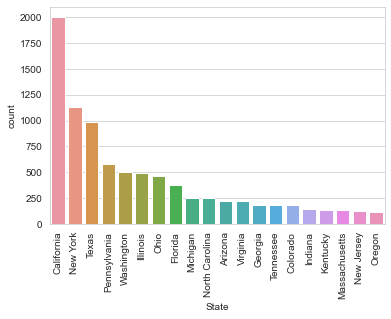

In [16]:
sns.set_style("whitegrid")
sns.countplot(x=sample['State'],order=(sample['State'].value_counts().head(20)).index)
plt.xticks(rotation=90);

### Maximum number of people are from "California" then "New York".

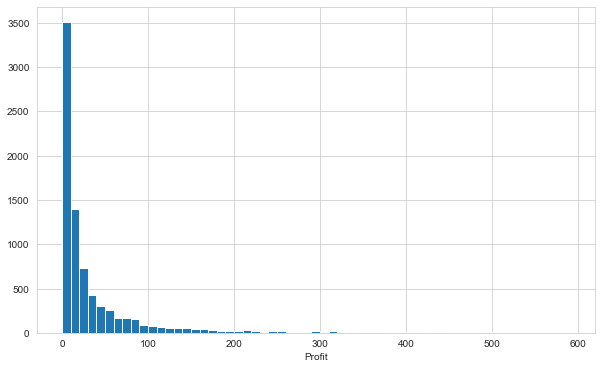

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.hist(sample['Profit'],bins=(np.arange(0,600,10)))
plt.xlabel("Profit");

### we find that maximum profit lies in the range of 0-100

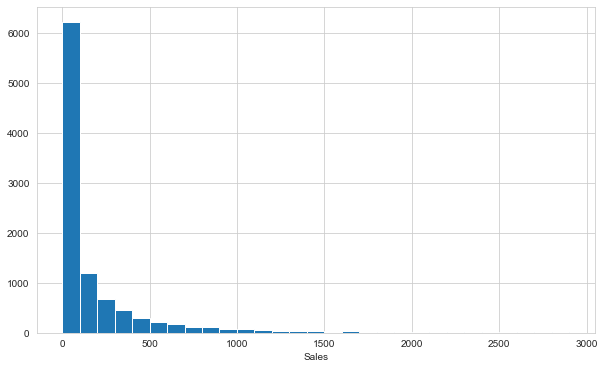

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.hist(sample['Sales'],bins=(np.arange(0,3000,100)))
plt.xlabel("Sales");

### This shows that the maximum sales range from 0-400

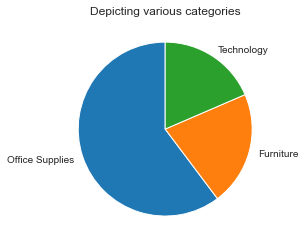

In [19]:
# Pie Chart for finding out the major category.

plt.pie(sample['Category'].value_counts(),labels= sample['Category'].value_counts().index, startangle=90)
plt.title("Depicting various categories");

### This shows that the major category is the "Office supplies"

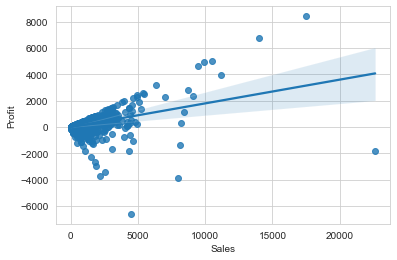

In [20]:
sns.set_style("whitegrid")
sns.regplot(sample['Sales'],sample['Profit']);

### The above regression plot shows that with increase with Sales, Profit also increases somehow. Since it is not in linear relation, we can't say that both are directly proportional!!

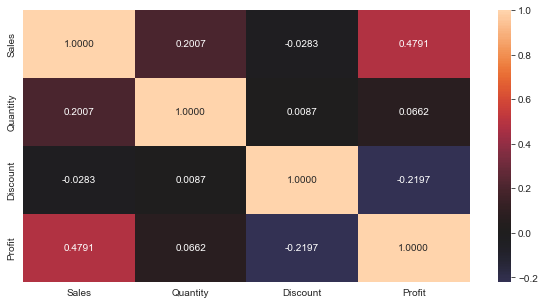

In [21]:
# Heatmap to know about the correlation between different features in the given dataset.
sns.set_style("whitegrid")
num_data=['Sales','Quantity','Discount','Profit']
plt.figure(figsize=(10,5))
sns.heatmap(sample[num_data].corr(),annot=True, fmt='.4f',center=0);

### A correlation is a statistical measurement of the relationship between two variables. Possible correlations range from +1 to –1. A zero correlation indicates that there is no relationship between the variables.Hence we come to know that the correlation between "Profit" and "Sales" is "0.4791". This shows that there is a positive realtion between them.Correlation between "Profit" and "Discount" is "-0.2197". This means that there is a weak negative relation between both of these numeric features.








## Insights derived from the above EDA:
#### 1- Imporovements should be made for same day shipment mode.
#### 2- We have to work more in the Southern region of USA for better business.
#### 3- Office Supplies are excellent. We have to work more on Furniture and Technology Category of business.
#### 4- There are very less people working as Copiers. So, the recruitment should be increased.
#### 5-Maximum number of people are from California and New York. We should expand in other parts of USA as well.
#### 6- Profit and Sales are not too much related, i.e., they are not directly proportional. Hence we have tp work separately gor increasing bith, sales and profit.
#### 7- Profit and Discount show very weak and negative relationship. That should be kept in mind before taking any other decision related to business.